# VGG16으로 ImageNet 분류

### 이미지 파일 다운로드

단지 모델의 동작만 imagenet의 파일로 확인하려고 한다.

전체 imagenet은 아주 크다. 몇 개 파일 일부만 다운로드해서 확인한다.

각 파일의 url은 http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02097474 을 호출하여 구하였다.


clsid n07734744은 버섯, n02097474는 강아지, n02123159은 고양이 이다.

!rm -rf imagenet
!mkdir imagenet

#### 버섯
- !wget -O imagenet/mushroom1.jpg http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
- !wget -O imagenet/mushroom2.jpg http://farm3.static.flickr.com/2416/1593642808_efcef6c9c2.jpg 
- !wget -O imagenet/mushroom3.jpg http://farm4.static.flickr.com/3003/2536991564_5f9b2f5b53.jpg
  
#### 강아지
- !wget -O imagenet/dog1.jpg http://farm1.static.flickr.com/58/160964915_d708f48d0d.jpg
- !wget -O imagenet/dog2.jpg http://farm1.static.flickr.com/51/144906086_049df05364.jpg
- !wget -O imagenet/dog3.jpg http://farm3.static.flickr.com/2133/2236535445_ca650757f2.jpg
  
#### 고양이  
- !wget -O imagenet/cat1.jpg http://farm1.static.flickr.com/131/393656824_bd89c512d0.jpg
- !wget -O imagenet/cat2.jpg http://farm1.static.flickr.com/213/505539125_d7193beb76.jpg
- !wget -O imagenet/cat3.jpg http://farm1.static.flickr.com/24/63785988_c16c10b4e5.jpg
  
  
!ls -al imagenet  
  

### 분류 실행
미리 학습된 VGG16 모델을 사용하여 ImageNet 데이터를 대상으로 분류한다.



In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from IPython.display import display # 이미지 출력 함수
import numpy as np

Using TensorFlow backend.


In [2]:
def predict_vgg16(model, filename):
    # 이미지 파일을 읽고 화면에 표시
    image = load_img(filename)
    # image = PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=688x550
    display(image)

    # 모델 사이즈로 이미지 파일을 읽기
    image = load_img(filename, target_size=(224, 224))
    # image = PIL.Image.Image image mode=RGB size=224x224

    # 이미지 데이터를 numpy로 변환
    image = img_to_array(image)
    # [
    #   [[211. 184. 163.]
    #    [225. 193. 170.]
    #    ...
    #    [237. 202. 180.]]
    #    ...
    # ]  
    #
    # image.shape = (224, 224, 3)

    # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
    # 보통 모델을 여러 이미지를 한번에 호출. 
    # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
    # 두번째 224 : width
    # 세번째 224 : height
    # 네번째 3 : R, G, B 3개
    image = image.reshape((1, 224, 224, 3))

    # VGG16 모델 호출을 위해 데이터 전처리.
    # -255 ~ 255 사이 값으로 정규화한다.
    # 그리고 RGB를 BGR순으로 바꾼다.
    image = vgg16.preprocess_input(image)

    # 이미지를 모델에 적용
    yhat = model.predict(image)
    # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
    #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
    #          ... ]] # 1000개 클래스에 대한 결과값.
    #

    # 모델 적용된 결과를 파싱
    label = vgg16.decode_predictions(yhat)
    # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

    # 가장 확률이 높은 결과를 획득
    label = label[0][0]
    # label = ('n02655020', 'puffer', 0.9612253)

    # 라벨과 라벨을 예측한 확률을 출력
    print('%s (%.2f%%)' % (label[1], label[2]*100)) 

In [3]:
from keras.applications import vgg16

# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

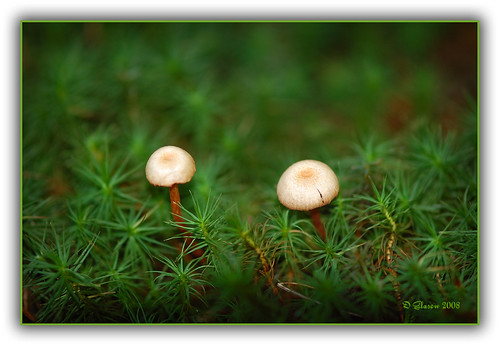

40960/35363 [==================================] - 0s 1us/step
acorn (33.86%)


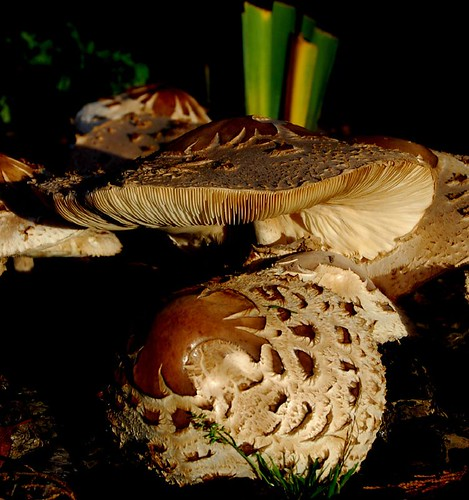

mushroom (70.65%)


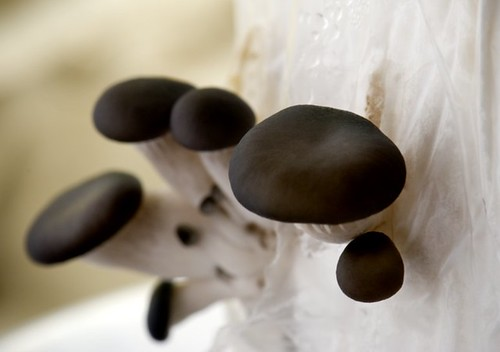

birdhouse (24.11%)


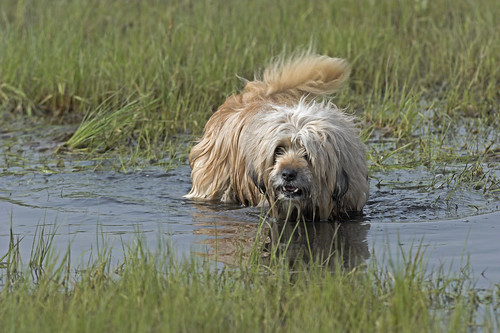

Tibetan_terrier (81.25%)


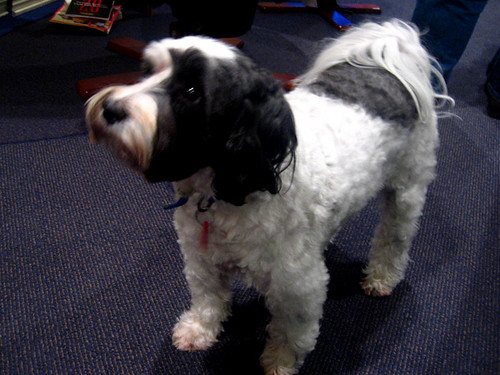

Tibetan_terrier (86.20%)


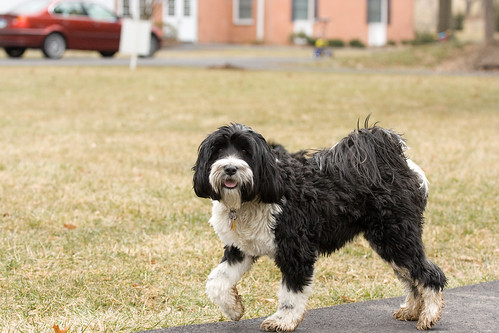

standard_poodle (23.31%)


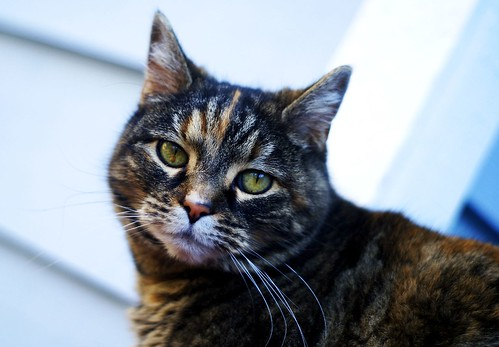

tabby (56.08%)


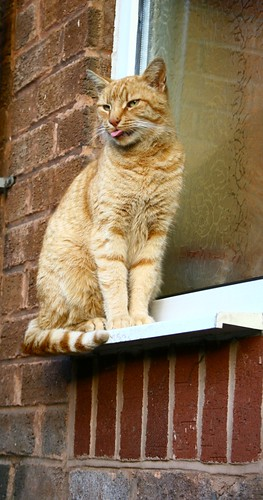

tiger_cat (39.65%)


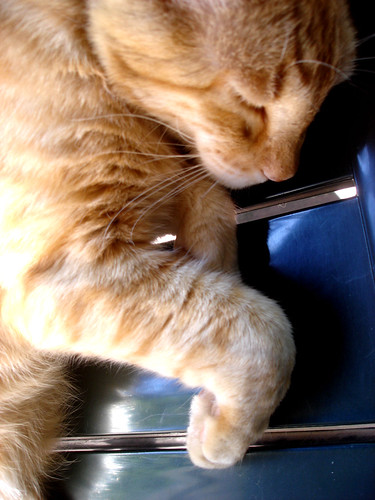

tiger_cat (18.94%)


In [4]:
# 테스트 할 이미지 파일들
files = [
    'imagenet/mushroom1.jpg',
    'imagenet/mushroom2.jpg',
    'imagenet/mushroom3.jpg',
    'imagenet/dog1.jpg',
    'imagenet/dog2.jpg',
    'imagenet/dog3.jpg',
    'imagenet/cat1.jpg',
    'imagenet/cat2.jpg',
    'imagenet/cat3.jpg',
]

# 분류 실행
for file in files :
    predict_vgg16(model, file)  